In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

Base.classes.keys()



['measurement', 'station']

In [7]:
# We can view all of the classes that automap found


In [8]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

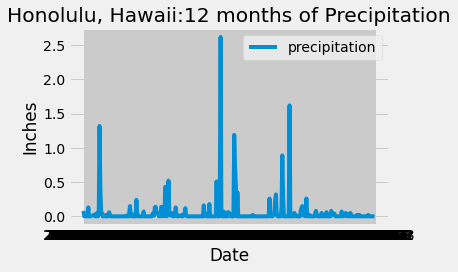

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by((Measurement.date).desc()).first()

last_date = dt.datetime(2017, 8, 23)

first_date = last_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.date, Measurement.prcp)\
                .filter(Measurement.date >=first_date)\
                .group_by(Measurement.date).all()
    
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

Precipitation_df= pd.DataFrame(precipitation)
Precipitation_df.set_index('date', inplace = True)
Precipitation_df.sort_values(by=['date'])


# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(Precipitation_df, label ="precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()
plt.title("Honolulu, Hawaii:12 months of Precipitation")
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

Precipitation_df.describe()

,prcp
count,362.000000
mean,0.048757
std,0.205475
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [12]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [15]:
# Choose the station with the highest number of temperature observations.

session.query(Measurement.station, func.count(Measurement.tobs))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.tobs).desc()).first()

# Query the last 12 months of temperature observation data for this station 

temp_results = session.query(Measurement.tobs, Measurement.date)\
            .filter(Measurement.station == "USC00519281")\
            .filter(Measurement.date >=first_date).all()
temp_results

[(80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '2016-10-05'),
 (75.0, '2016-10-06'),
 (76.0, '20

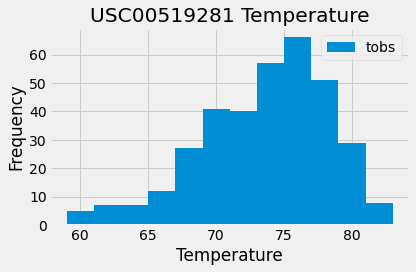

In [16]:
# Plot the results as a histogram

temp_df = pd.DataFrame(temp_results, columns =["Temperature", "Date"])
temp_df


plt.hist(temp_df['Temperature'], bins=12, histtype='bar', label ="tobs")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("USC00519281 Temperature")
plt.tight_layout()
